In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet(f'Pairs_SP500_FPT/spx_impl_vols.parquet')
df.head()

,Id,Date,ff_isin,p_price,p_opt_atmiv_mkt,company
0,CTAS-US,1990-09-21,US1729081059,4.416666,NaN,CTAS-US
1,CTAS-US,1990-09-24,US1729081059,4.388889,NaN,CTAS-US
2,CTAS-US,1990-09-25,US1729081059,4.388889,NaN,CTAS-US
3,CTAS-US,1990-09-26,US1729081059,4.347222,NaN,CTAS-US
4,CTAS-US,1990-09-27,US1729081059,4.305556,NaN,CTAS-US


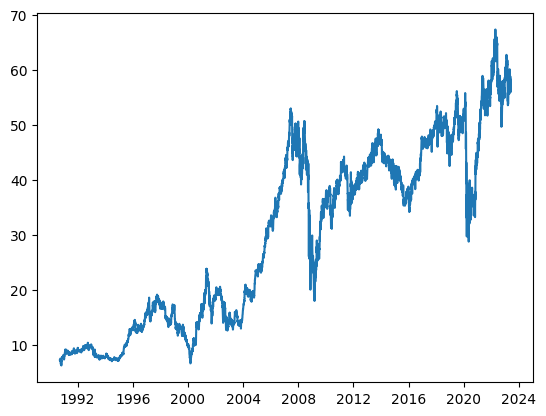

In [7]:
mask = (df['Id']=='L-US')#&(df['Date']>'2006-01-01')&(df['Date']<'2007-01-01')
plt.plot(df.loc[mask,'Date'],df.loc[mask,'p_price'])

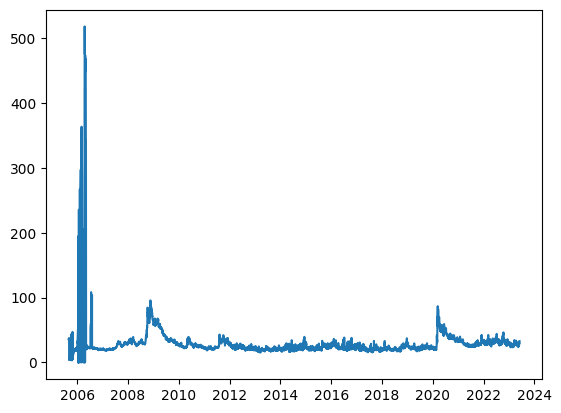

In [8]:
plt.plot(df.loc[mask,'Date'],df.loc[mask,'p_opt_atmiv_mkt'])

In [4]:
df.loc[(df['Id']=='L-US')&(df['p_opt_atmiv_mkt']<=.1),:]

,Id,Date,ff_isin,p_price,p_opt_atmiv_mkt,company
3862,L-US,2006-01-17,US5404241086,33.396667,0.100000,L-US
3863,L-US,2006-01-18,US5404241086,33.126667,0.010005,L-US
3864,L-US,2006-01-19,US5404241086,33.399998,0.100000,L-US
3865,L-US,2006-01-20,US5404241086,33.086666,0.010005,L-US
3867,L-US,2006-01-24,US5404241086,32.973330,0.010005,L-US
3870,L-US,2006-01-27,US5404241086,33.156666,0.010000,L-US
3890,L-US,2006-02-27,US5404241086,30.839998,0.010000,L-US
3891,L-US,2006-02-28,US5404241086,30.753334,0.010000,L-US
3912,L-US,2006-03-29,US5404241086,34.260000,0.100000,L-US
3913,L-US,2006-03-30,US5404241086,34.146667,0.100000,L-US


In [6]:
df = df.dropna()
stocks = pd.unique(df['Id'])
count = 0
final_df = pd.DataFrame(columns=df.columns)
for s in stocks:
    count+=1
    df_aux = df[df['Id']==s]
    mask = df_aux['p_opt_atmiv_mkt']<1
    df_aux.loc[mask, 'p_opt_atmiv_mkt'] = np.nan
    df_aux.loc[:,'p_opt_atmiv_mkt'] = df_aux.loc[:,'p_opt_atmiv_mkt'].interpolate(method='slinear')
    final_df = pd.concat([final_df, df_aux])
print(count)

1
2
3


/tmp/ipykernel_135092/2983575410.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, df_aux])


4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
27

In [7]:
final_df.sample(10)

,Id,Date,ff_isin,p_price,p_opt_atmiv_mkt,company
6913,DRI-US,2018-03-01,US2371941053,92.5000,25.511193,DRI-US
4407,VFC-US,2008-03-18,US9182041080,19.5275,37.776320,VFC-US
3911,TMO-US,2006-03-28,US8835561023,36.1200,20.984800,TMO-US
8152,IR-US,2023-02-01,US45687V1061,55.6600,35.470749,IR-US
8119,AAPL-US,2022-12-13,US0378331005,145.4700,33.939898,AAPL-US
6261,PCG-US,2015-07-29,US69331C1080,52.3400,21.643648,PCG-US
5376,ITW-US,2012-01-20,US4523081093,51.4700,26.674370,ITW-US
6765,EXC-US,2017-07-28,US30161N1019,38.4000,17.885846,EXC-US
5123,MCD-US,2011-01-19,US5801351017,75.3500,19.764220,MCD-US
6629,HON-US,2017-01-12,US4385161066,117.6300,21.074029,HON-US


In [13]:
aux = final_df[final_df['Id']=='L-US']
aux[aux['p_opt_atmiv_mkt'].shift(-1)/aux['p_opt_atmiv_mkt'] < .10]

,Id,Date,ff_isin,p_price,p_opt_atmiv_mkt,company
3772,L-US,2005-09-07,US5404241086,29.663332,37.682510,L-US
3803,L-US,2005-10-20,US5404241086,29.626665,45.328010,L-US
3870,L-US,2006-01-27,US5404241086,33.156666,119.248344,L-US
3939,L-US,2006-05-08,US5404241086,36.740000,337.184200,L-US


In [5]:
df1 = pd.read_parquet(f'Pairs_SP500_FPT/spx_impl_vols.parquet')
df2 = pd.read_parquet(f'Pairs_SP500_FPT/spx_impl_vols_clean.parquet')
df1 = df1.dropna()
len(df1)

1951698

In [6]:
len(df2)

1951698

In [8]:
df1[df1['Id']=='AON-US']

,Id,Date,ff_isin,p_price,p_opt_atmiv_mkt,company
7439,AON-US,2020-04-02,IE00BLP1HW54,157.26,51.182163,AON-US
7440,AON-US,2020-04-03,IE00BLP1HW54,154.14,51.606666,AON-US
7441,AON-US,2020-04-06,IE00BLP1HW54,173.15,43.630585,AON-US
7442,AON-US,2020-04-07,IE00BLP1HW54,175.92,43.275500,AON-US
7443,AON-US,2020-04-08,IE00BLP1HW54,187.96,41.940345,AON-US
...,...,...,...,...,...,...
8231,AON-US,2023-05-25,IE00BLP1HW54,311.19,26.317586,AON-US
8232,AON-US,2023-05-26,IE00BLP1HW54,310.67,25.804771,AON-US
8233,AON-US,2023-05-30,IE00BLP1HW54,311.86,25.193563,AON-US
8234,AON-US,2023-05-31,IE00BLP1HW54,308.29,26.108089,AON-US


In [25]:
aux = df[df['Id']=='L-US']
# mask = aux['p_opt_atmiv_mkt'].shift(1)/aux['p_opt_atmiv_mkt'] > 100
aux.loc[aux['p_opt_atmiv_mkt']<1, 'p_opt_atmiv_mkt'] = np.nan


In [32]:
aux[aux['p_opt_atmiv_mkt']<1]

,Id,Date,ff_isin,p_price,p_opt_atmiv_mkt,company


In [27]:
aux[np.isnan(aux['p_opt_atmiv_mkt'])]

,Id,Date,ff_isin,p_price,p_opt_atmiv_mkt,company
3862,L-US,2006-01-17,US5404241086,33.396667,NaN,L-US
3863,L-US,2006-01-18,US5404241086,33.126667,NaN,L-US
3864,L-US,2006-01-19,US5404241086,33.399998,NaN,L-US
3865,L-US,2006-01-20,US5404241086,33.086666,NaN,L-US
3867,L-US,2006-01-24,US5404241086,32.973330,NaN,L-US
3870,L-US,2006-01-27,US5404241086,33.156666,NaN,L-US
3890,L-US,2006-02-27,US5404241086,30.839998,NaN,L-US
3891,L-US,2006-02-28,US5404241086,30.753334,NaN,L-US
3912,L-US,2006-03-29,US5404241086,34.260000,NaN,L-US
3913,L-US,2006-03-30,US5404241086,34.146667,NaN,L-US


In [31]:
len(aux['p_opt_atmiv_mkt'].dropna())

4437

In [24]:
aux.loc[:,'p_opt_atmiv_mkt'] = aux.loc[:,'p_opt_atmiv_mkt'].interpolate(method='slinear')

In [23]:
aux[np.isnan(aux['p_price'])]

,Id,Date,ff_isin,p_price,p_opt_atmiv_mkt,company
3862,NaN,NaT,NaN,NaN,98.084893,NaN
3863,NaN,NaT,NaN,NaN,122.379470,NaN
3864,NaN,NaT,NaN,NaN,146.674047,NaN
3865,NaN,NaT,NaN,NaN,170.968623,NaN
3867,NaN,NaT,NaN,NaN,119.174680,NaN
3870,NaN,NaT,NaN,NaN,119.248344,NaN
3890,NaN,NaT,NaN,NaN,252.600933,NaN
3891,NaN,NaT,NaN,NaN,276.713967,NaN
3912,NaN,NaT,NaN,NaN,161.115121,NaN
3913,NaN,NaT,NaN,NaN,167.174443,NaN


In [3]:
df['mu_y'] = df['mu_y']*252
df['mu_x'] = df['mu_x']*252
df['sigma_y'] = df['sigma_y']*(252**.5)
df['sigma_x'] = df['sigma_x']*(252**.5)
df.head()

,Stock_y,Stock_x,Start_Date,End_Date,mu_y,mu_x,lambda_1,lambda_2,sigma_y,sigma_x,rho_xy
0,AAP_US,ACN_US,2009-01-05,2012-01-03,0.163088,-0.678010,-0.002665,0.020353,0.289315,0.283182,0.275683
1,AAP_US,ACN_US,2009-07-07,2012-07-03,-0.014957,-0.464820,-0.004826,0.015606,0.276749,0.254949,0.281378
2,AAP_US,ACN_US,2010-01-05,2013-01-04,-0.045586,-0.633985,-0.006308,0.018422,0.280260,0.255629,0.298389
3,AAP_US,ACN_US,2010-07-07,2013-07-08,-0.023560,-0.531478,-0.005257,0.017994,0.272877,0.255904,0.305590
4,AAP_US,ACN_US,2011-01-04,2014-01-06,-0.127475,-0.540722,-0.009281,0.019840,0.285252,0.250279,0.309834


In [4]:
UNIVERSE = 'spx'
# UNIVERSE = 'djiak'

RECALC_PAIRS = True
RECALC_RETURNS = True

pairs_file = f'pkl_data/{UNIVERSE}_pairs_MLE_v10_0.parquet'
try:
    pairs_df = pd.read_parquet(pairs_file)
except Exception as e:
    print(f"File not found: {pairs_file}. {e}")

if len(pairs_df):
    unique_end_dates = pairs_df["End_Date"].unique()
    first_trading_day = np.min(unique_end_dates)

df_original = pd.read_parquet(f'Pairs_SP500_FPT/{UNIVERSE}_impl_vols.parquet')

# Define the window size and step size of the pairs construction
YEAR = 252 # a month has approximately 252 trading days (252 samples)
window_size = 3 * YEAR  # 3 years - 756 samples
step_size = YEAR // 2  # 6 months - 126 samples 

# Step 2: process the df
df_original['Date'] = pd.to_datetime(df_original['Date'], format='%Y-%m-%d') # Convert column date to datetime
df_original = df_original[df_original['Date']>='2003-01-01']    # filter the df so it only mantains the desired dates (we have to take one day prior to the first to do the estimations)

df_original = df_original[~df_original['p_price'].isna()]  # Eliminate rows that have no stock prices
df_original['Id'] = df_original['Id'].str.replace('-', '_') # Change name of the columns to avoid calculation issues


df = pd.DataFrame(df_original)
df = df[df['Date'] >= first_trading_day]

# Check number of NAs per stock in implied_vols
df[df['p_opt_atmiv_mkt'].isna()]["Id"].value_counts()

# interpolate to get rid of the impl vols NAs
df['p_opt_atmiv_mkt'] = df['p_opt_atmiv_mkt'].interpolate()

series02 = df.pivot(index='Date', columns='Id', values='p_opt_atmiv_mkt')
series02 = series02.sort_index()
series02 = series02.dropna(axis=1)
        
series02.head()

Id,AAPL_US,AAP_US,ABC_US,ABT_US,ACGL_US,ACN_US,ADBE_US,ADI_US,ADM_US,ADP_US,...,WTW_US,WYNN_US,WY_US,XEL_US,XOM_US,XRAY_US,YUM_US,ZBH_US,ZBRA_US,ZION_US
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,44.63911,27.72551,12.42381,22.13542,24.78480,29.32852,35.20016,28.83335,28.10998,18.76097,...,24.31078,37.77156,22.07953,24.94607,22.17915,209.3095,20.65317,26.93331,31.76641,20.44597
2006-01-04,43.77833,27.47350,12.05571,22.12479,24.77474,29.44095,32.41963,28.49273,28.34801,18.48576,...,25.12733,37.62891,21.84783,20.76470,22.10957,262.3021,23.33494,27.07848,31.93814,20.74832
2006-01-05,42.70568,27.39647,33.09947,21.97807,25.07201,29.39103,32.22445,28.12614,28.04973,18.74402,...,24.15048,37.86014,21.93142,18.91373,22.23835,208.7240,24.76978,27.29498,31.18432,19.88863
2006-01-06,43.03213,27.78639,29.85502,20.69412,24.59680,25.99901,32.40571,27.86459,27.58995,18.20103,...,24.29620,37.97452,21.57941,24.99762,21.94681,268.0060,29.44610,27.19534,31.31082,19.57695
2006-01-09,43.09848,27.23706,21.45077,21.38205,25.02710,26.15307,32.88718,28.60741,28.34035,18.39345,...,24.18261,38.68236,21.58571,20.28699,22.27487,283.8848,28.87685,26.57638,31.68627,19.67743


In [62]:
import pickle as pkl

In [64]:
df = series02.copy()
df = df/df.shift(-1)
df = df.dropna()
has_change = ((~df[(df>10**1)|(df<10**-1)].isna()).sum())
# has_change = (~df[df>1000].isna()).sum()
list_broken = list(has_change[has_change>0].index)
len(list_broken)
seta = set(list_broken)
with open('pkl_data/exclude_stocks_list_1.pkl','wb') as f:
    pkl.dump(list_broken, f)

In [65]:
df = series02.copy()
# df = df/df.shift(-1)
df = df.dropna()
# has_change = ((~df[(df>10**3)|(df<10**-3)].isna()).sum())
has_change = (~df[df<.1].isna()).sum()
list_broken = list(has_change[has_change>0].index)
len(list_broken)
setb = set(list_broken)
with open('pkl_data/exclude_stocks_list_2.pkl','wb') as f:
    pkl.dump(list_broken, f)

In [60]:
seta == setb

False

In [33]:
data = {
    'stock':[],
    'start':[],
    'end':[],
}
for l in list_broken:
    s = series02[l]
    i = s/s.shift(-1)
    i = (i>10**1)|(i<10**-1)
    dates = list(s[i].index)
    data['stock'].append(l)
    data['start'].append(min(dates))
    data['end'].append(max(dates))
df = pd.DataFrame(data)
df

,stock,start,end
0,ABC_US,2006-03-08,2009-05-29
1,ALB_US,2006-04-13,2007-02-02
2,ANSS_US,2006-02-15,2007-06-04
3,APH_US,2006-03-28,2006-11-28
4,ATVI_US,2006-09-12,2007-08-31
5,BWA_US,2006-01-09,2007-05-23
6,CBRE_US,2006-01-10,2006-05-31
7,CMI_US,2006-01-17,2007-07-13
8,D_US,2006-01-12,2007-11-19
9,FMC_US,2006-05-03,2007-09-13


In [26]:
max(df.loc[(df['stock']!='ABC_US') & (df['stock']!='F_US'),'end'])

Timestamp('2020-01-30 00:00:00')

In [16]:
s = series02['ABC_US']
i = s/s.shift(-1)
i = (i>10**3)|(i<10**-3)
s[i]

Date
2007-08-09    186.343800
2008-12-04    277.640800
2008-12-05      0.129227
2009-02-27      0.147385
2009-03-03    269.831400
2009-03-05      0.119355
2009-03-16      0.066219
2009-03-18     94.851170
2009-03-19      0.067144
Name: ABC_US, dtype: float64